In [14]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.5 MB/s eta 0:00:00


In [97]:
import pandas as pd
from google.colab import files

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1
from sklearn.model_selection import train_test_split

In [118]:
import pandas as pd
data_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(data_url)

In [119]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [121]:
df.drop(columns=['Name', 'PassengerId','Ticket'],
        inplace=True, errors='ignore')
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C


In [122]:
def cross_validation (X, y, model, scoring, cv_rule):
    scores = cross_validate(model,X, y,
                      scoring=scoring, cv=cv_rule )
    print('cross_validation')
    DF_poly = pd.DataFrame(scores)
    display(DF_poly)
    print('\n')
    print(DF_poly.mean()[2:])

In [123]:
def feature_importance_plotter(model, features_names):
    feature_importance = model.feature_importances_/np.sum(model.feature_importances_)

    sorted = np.argsort(feature_importance)

    ypos = np.arange(len(features_names))

    fig= plt.figure(figsize=(8,4))
    plt.barh(ypos, feature_importance[sorted])
    plt.xlim([0,1])
    plt.ylabel('parameters')
    plt.xlabel('values')
    plt.yticks(ypos,features_names[sorted] );

In [124]:
scoring = {'ACC': 'accuracy',
           'F1': 'f1',
           'Precision': 'precision',
           'Recall': 'recall'}

cv_clf = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)

In [125]:
X = df.drop(columns = ["Survived"])
y = df["Survived"]



# Assuming df is already loaded

# Select categorical columns
cat_columns =   X.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", cat_columns)

# Select numerical columns
num_columns = X.select_dtypes(include=['number']).columns.tolist()
print("Numerical columns:", num_columns)


features_names = list(df.drop(columns = ["Survived"]).columns)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Categorical columns: ['Sex', 'Cabin', 'Embarked']
Numerical columns: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [126]:
for column in X_test[cat_columns].columns:
  print(X_test[column].unique())

['male' 'female']
[nan 'D47' 'C123' 'D28' 'D19' 'C110' 'A6' 'D48' 'B69' 'B96 B98' 'E68'
 'B58 B60' 'E77' 'D20' 'B57 B59 B63 B66' 'C148' 'E49' 'B39' 'F33' 'E34'
 'A7' 'D36' 'E36' 'D50' 'C126' 'D' 'B49' 'E63' 'A31' 'C92' 'E25' 'C95'
 'A5' 'D15' 'D7' 'D17' 'B86' 'A20' 'B78' 'B30' 'D21' 'D10 D12' 'G6' 'C124'
 'B38' 'C52' 'C93' 'C45' 'B20' 'C82' 'C78' 'C106' 'C22 C26' 'B28' 'C104'
 'F2' 'D11' 'C86' 'E38']
['C' 'S' 'Q' nan]


In [127]:
# Fill NaNs in categorical columns and cast to string
X_train[cat_columns] = X_train[cat_columns].astype(str).fillna('nan')
X_test[cat_columns] = X_test[cat_columns].astype(str).fillna('nan')

In [107]:
#for col in cat_columns:
   # mode = X_train[col].mode()[0]  # Get the most frequent value
    #X_train[col].fillna(mode, inplace=True)
    #X_test[col].fillna(mode, inplace=True)


<ipython-input-107-d475e5091513>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(mode, inplace=True)
<ipython-input-107-d475e5091513>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [128]:
features_names

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']

In [129]:
from catboost import Pool
train_data = Pool(
    data=X_train,
    label=y_train,
    cat_features = cat_columns,
    feature_names=features_names
)

eval_data = Pool(
    data=X_test,
    label=y_test,
    cat_features = cat_columns,
    feature_names=features_names
)

In [130]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations = 1000,
                           early_stopping_rounds=100,
                           verbose = 100,
                           cat_features = cat_columns,
                           depth = 3,
                           eval_metric= 'BalancedAccuracy'
                           )

In [131]:
model.fit(X=train_data,
          eval_set=eval_data,
          )

Learning rate set to 0.028193
0:	learn: 0.7243352	test: 0.7318242	best: 0.7318242 (0)	total: 7.62ms	remaining: 7.61s
100:	learn: 0.7770176	test: 0.7739140	best: 0.7958914 (42)	total: 525ms	remaining: 4.67s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7958914328
bestIteration = 42

Shrink model to first 43 iterations.


In [133]:
y_predict=model.predict(eval_data)

print (classification_report(y_test,
                             y_predict,
                             target_names=['survived',
                                           'not survived']))

              precision    recall  f1-score   support

    survived       0.81      0.90      0.85       157
not survived       0.83      0.69      0.75       111

    accuracy                           0.81       268
   macro avg       0.82      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



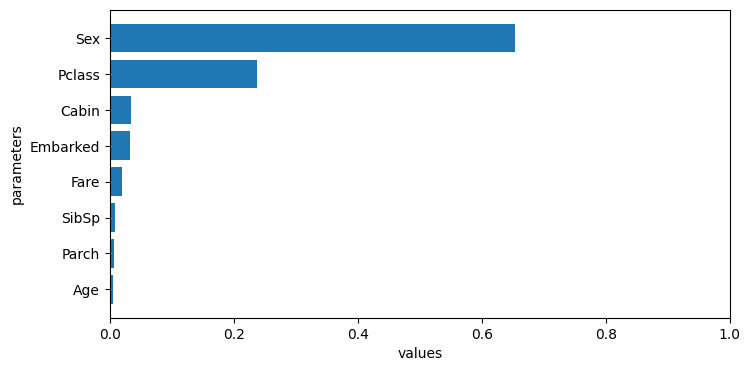

In [134]:
feature_importance_plotter(model,
                           np.array(features_names))

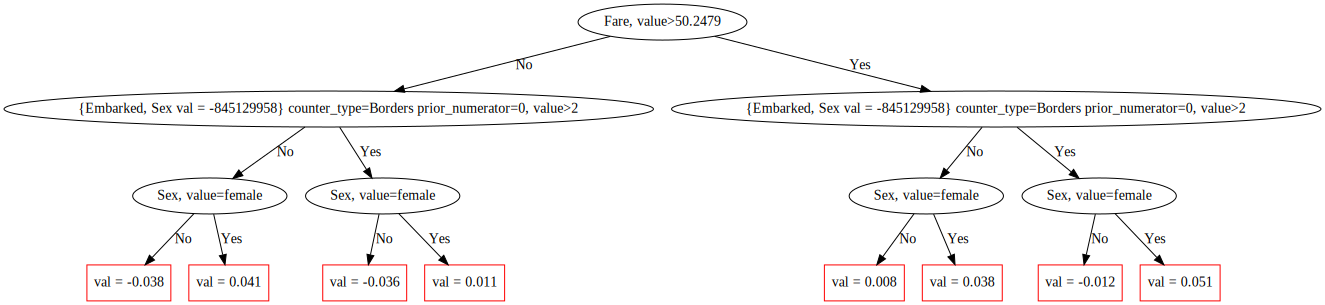

In [135]:
#@title Глубина дерева для Отрисовки{ run: "auto" }
tree_idx=9 #@param {type:"slider", min:0, max:25, step:1}

model.plot_tree(tree_idx=tree_idx,
                pool = train_data)

In [115]:
metrics = model.eval_metrics(eval_data, metrics = ['AUC','Logloss','TotalF1']);

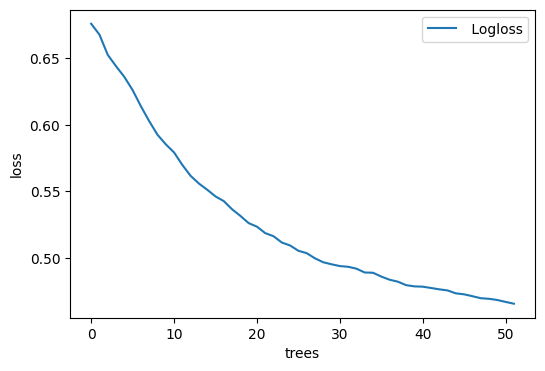

In [117]:
plt.figure(figsize=(6,4))
plt.plot(metrics["Logloss"], label=" Logloss")
plt.xlabel("trees")
plt.ylabel("loss")
plt.legend();